In [ ]:
# https://universe.roboflow.com/yolo-do-it-yhopz/helmet-detector-9rzmg-bmd6q

In [1]:
!nvidia-smi

Tue Mar  4 15:10:32 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   75C    P8             18W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 35.9/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

In [7]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="lz9BvyXvqeSSZKUANmF3")
project = rf.workspace("yolo-do-it-yhopz").project("helmet-detector-9rzmg-bmd6q")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [6]:
dataset.location

'/content/Helmet-Detector-1'

In [7]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640


Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Helmet-Detector-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

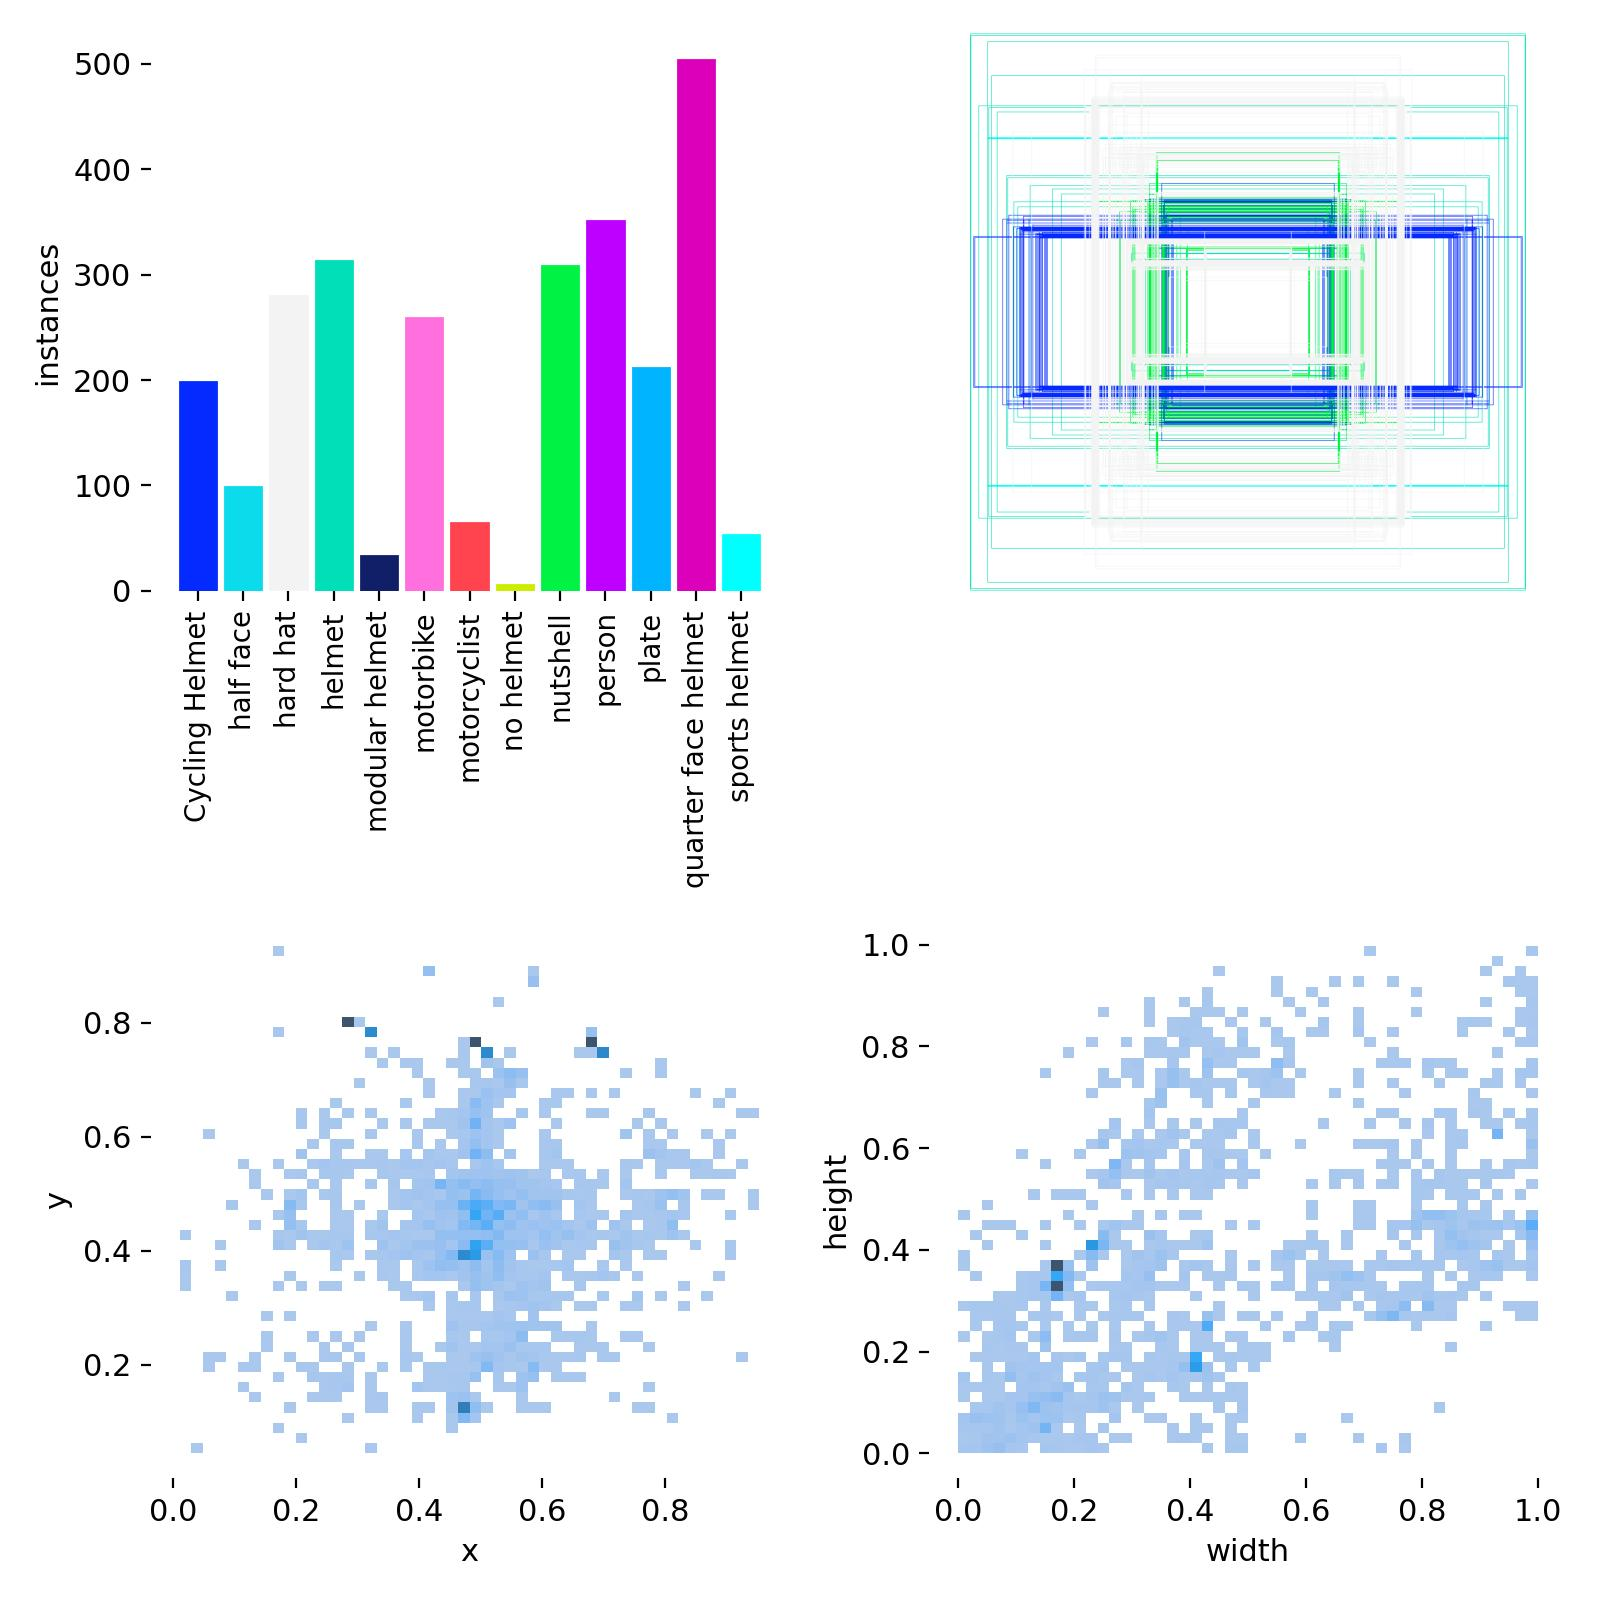

In [10]:
Image("/content/runs/detect/train2/labels.jpg", width=600)

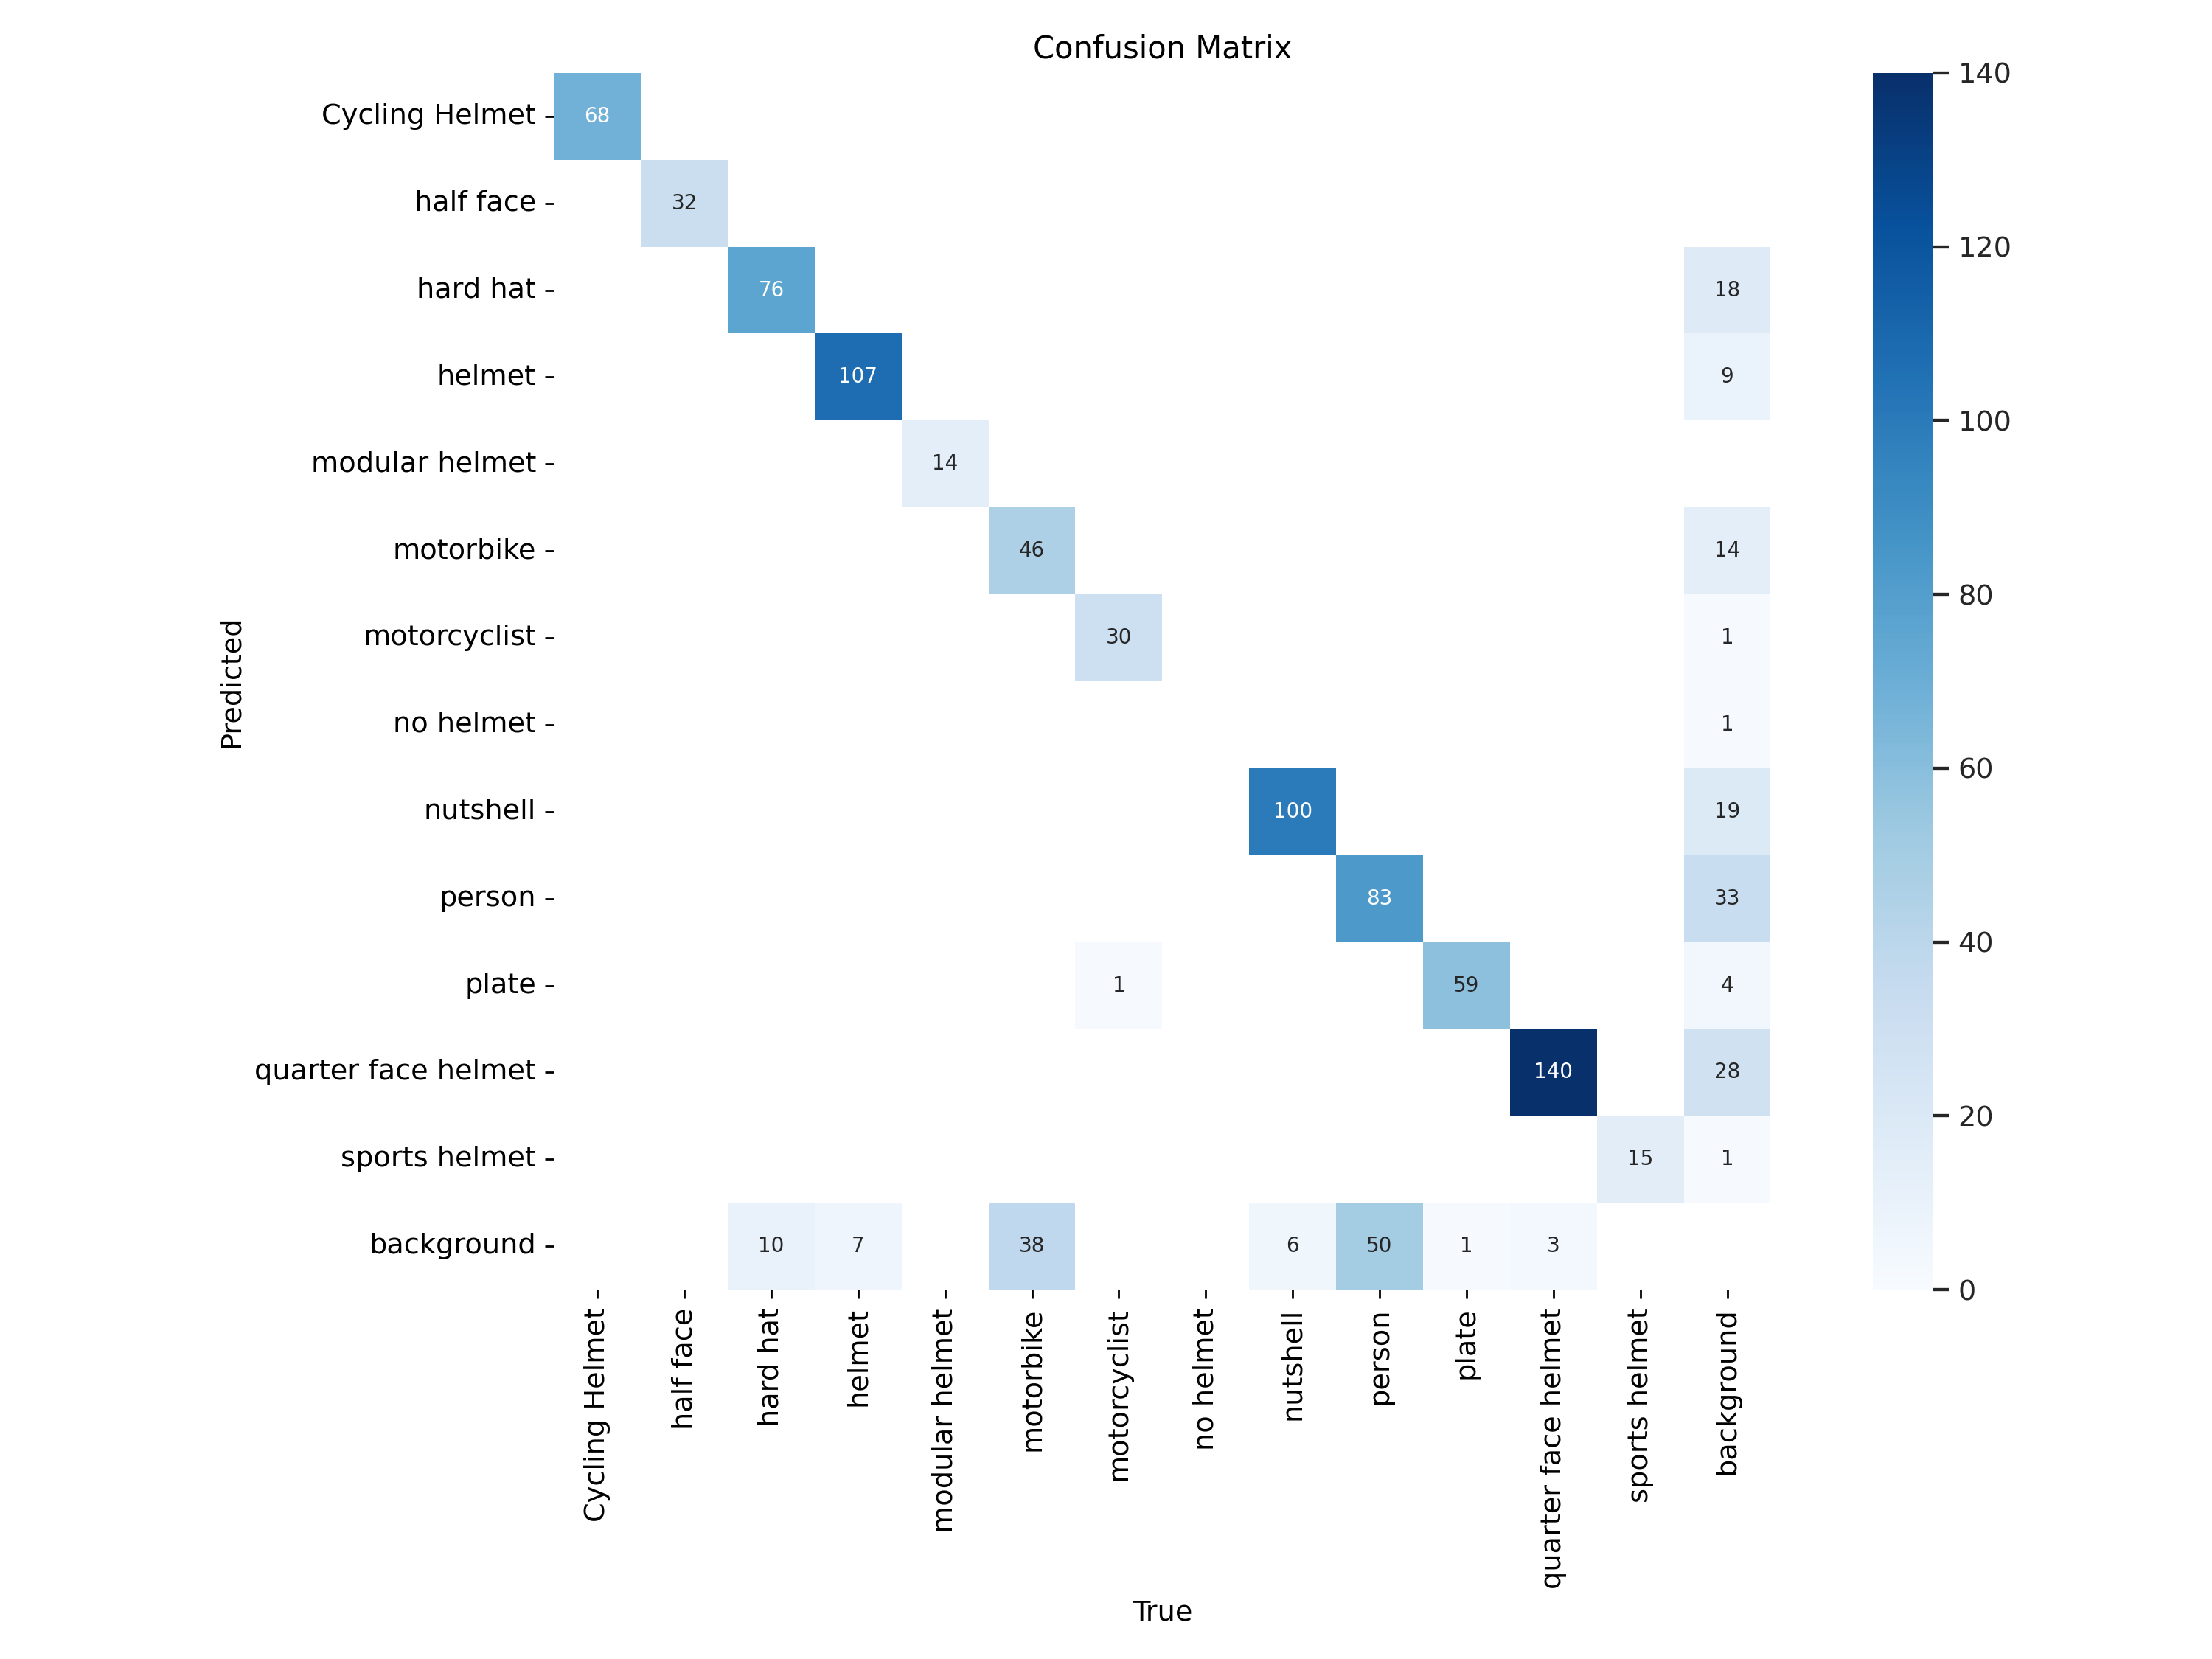

In [11]:
Image("/content/runs/detect/train2/confusion_matrix.png", width=600)

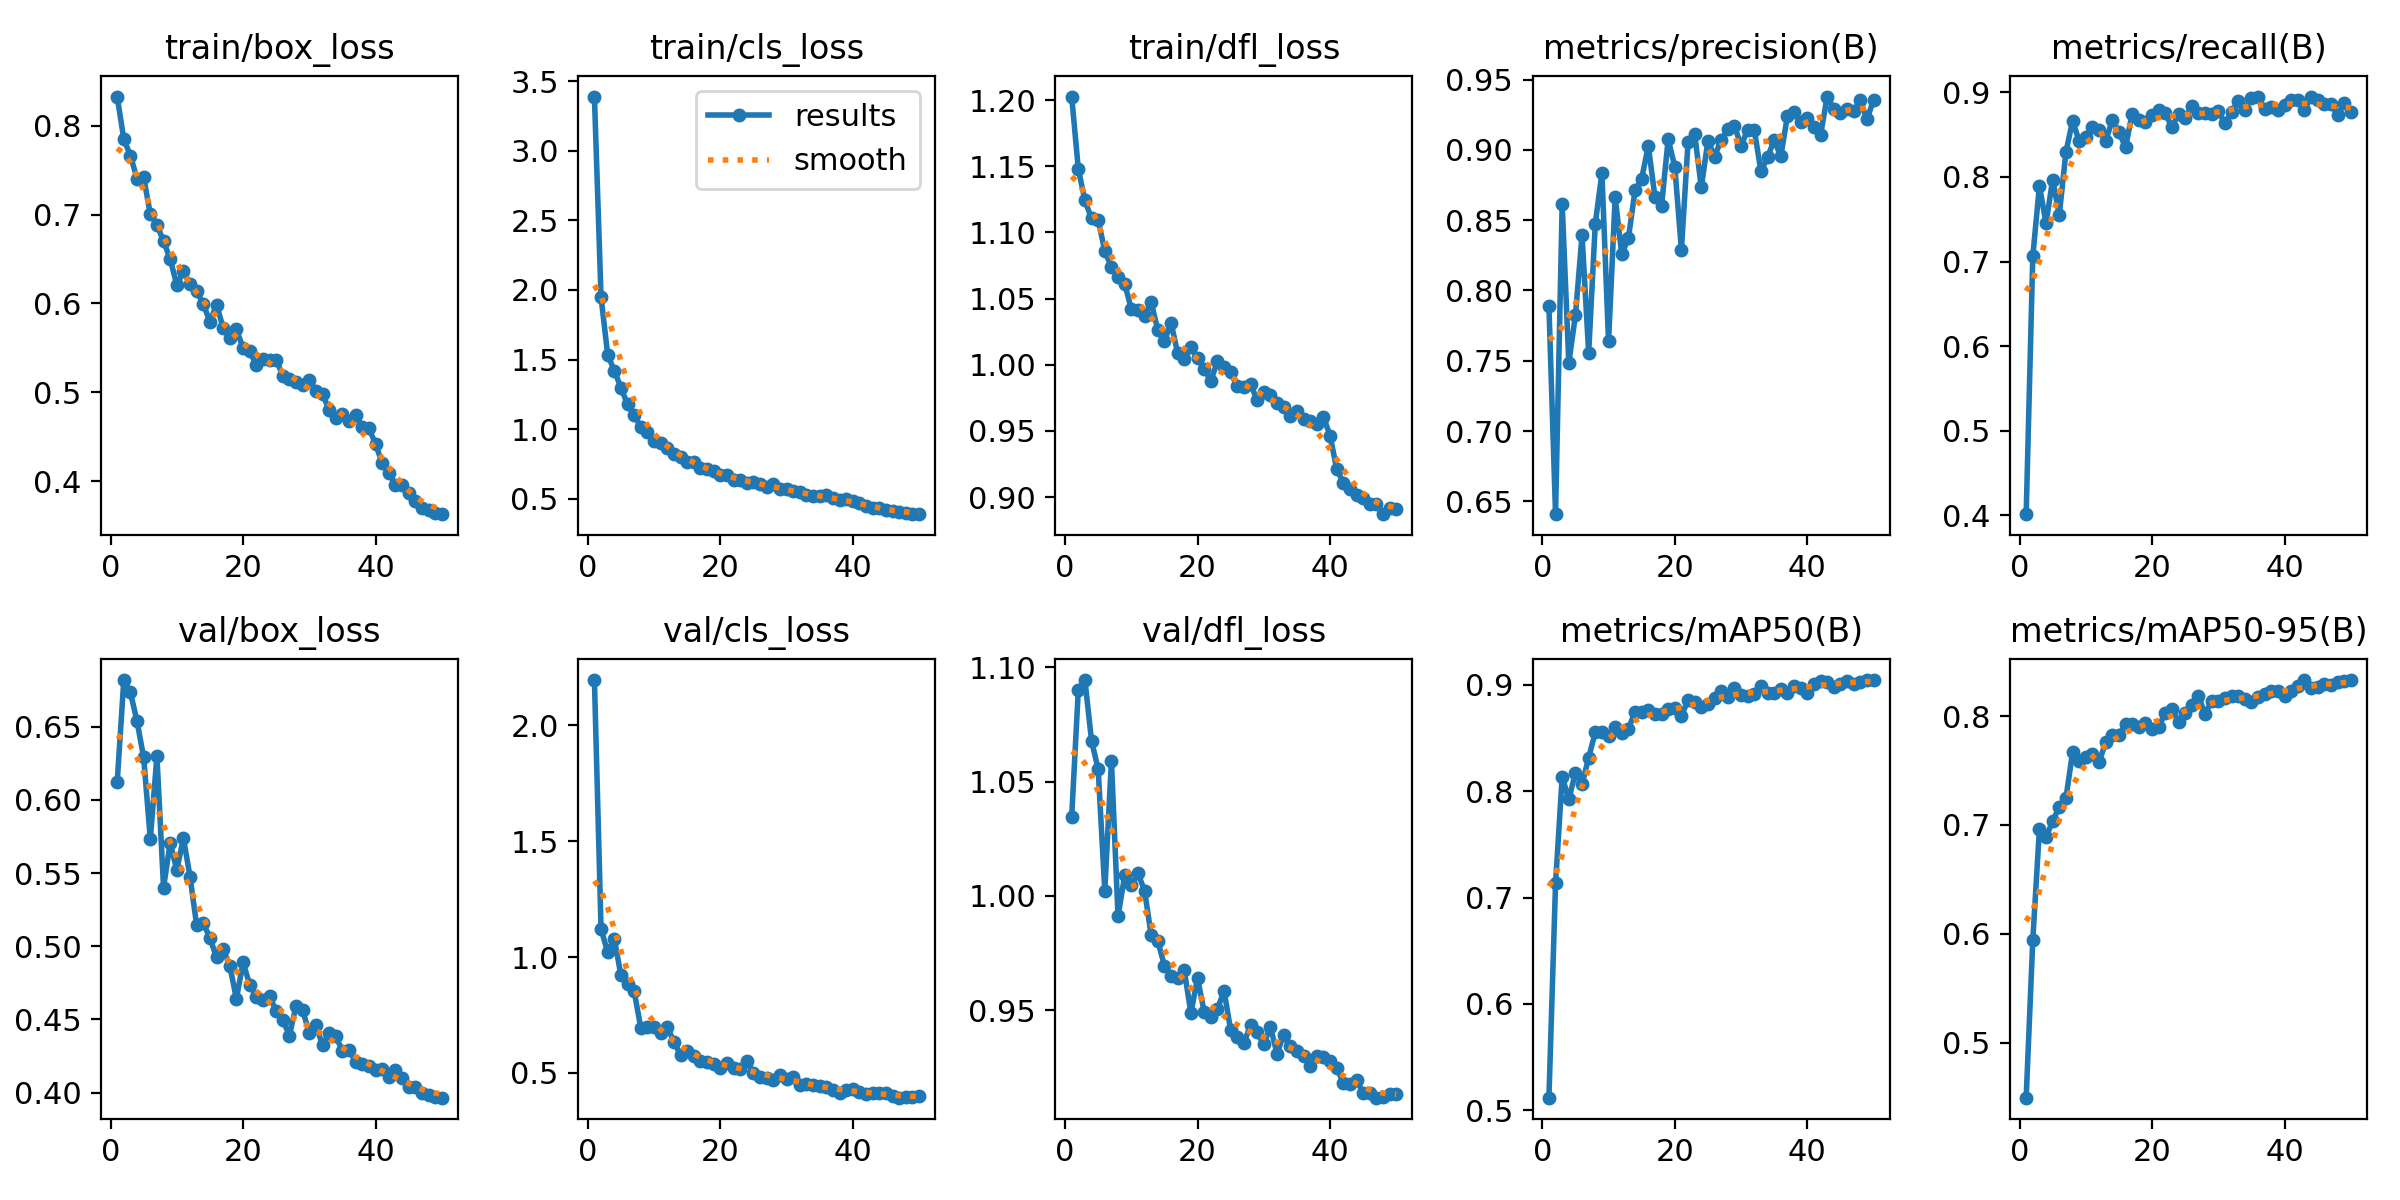

In [12]:
Image("/content/runs/detect/train2/results.png", width=600)

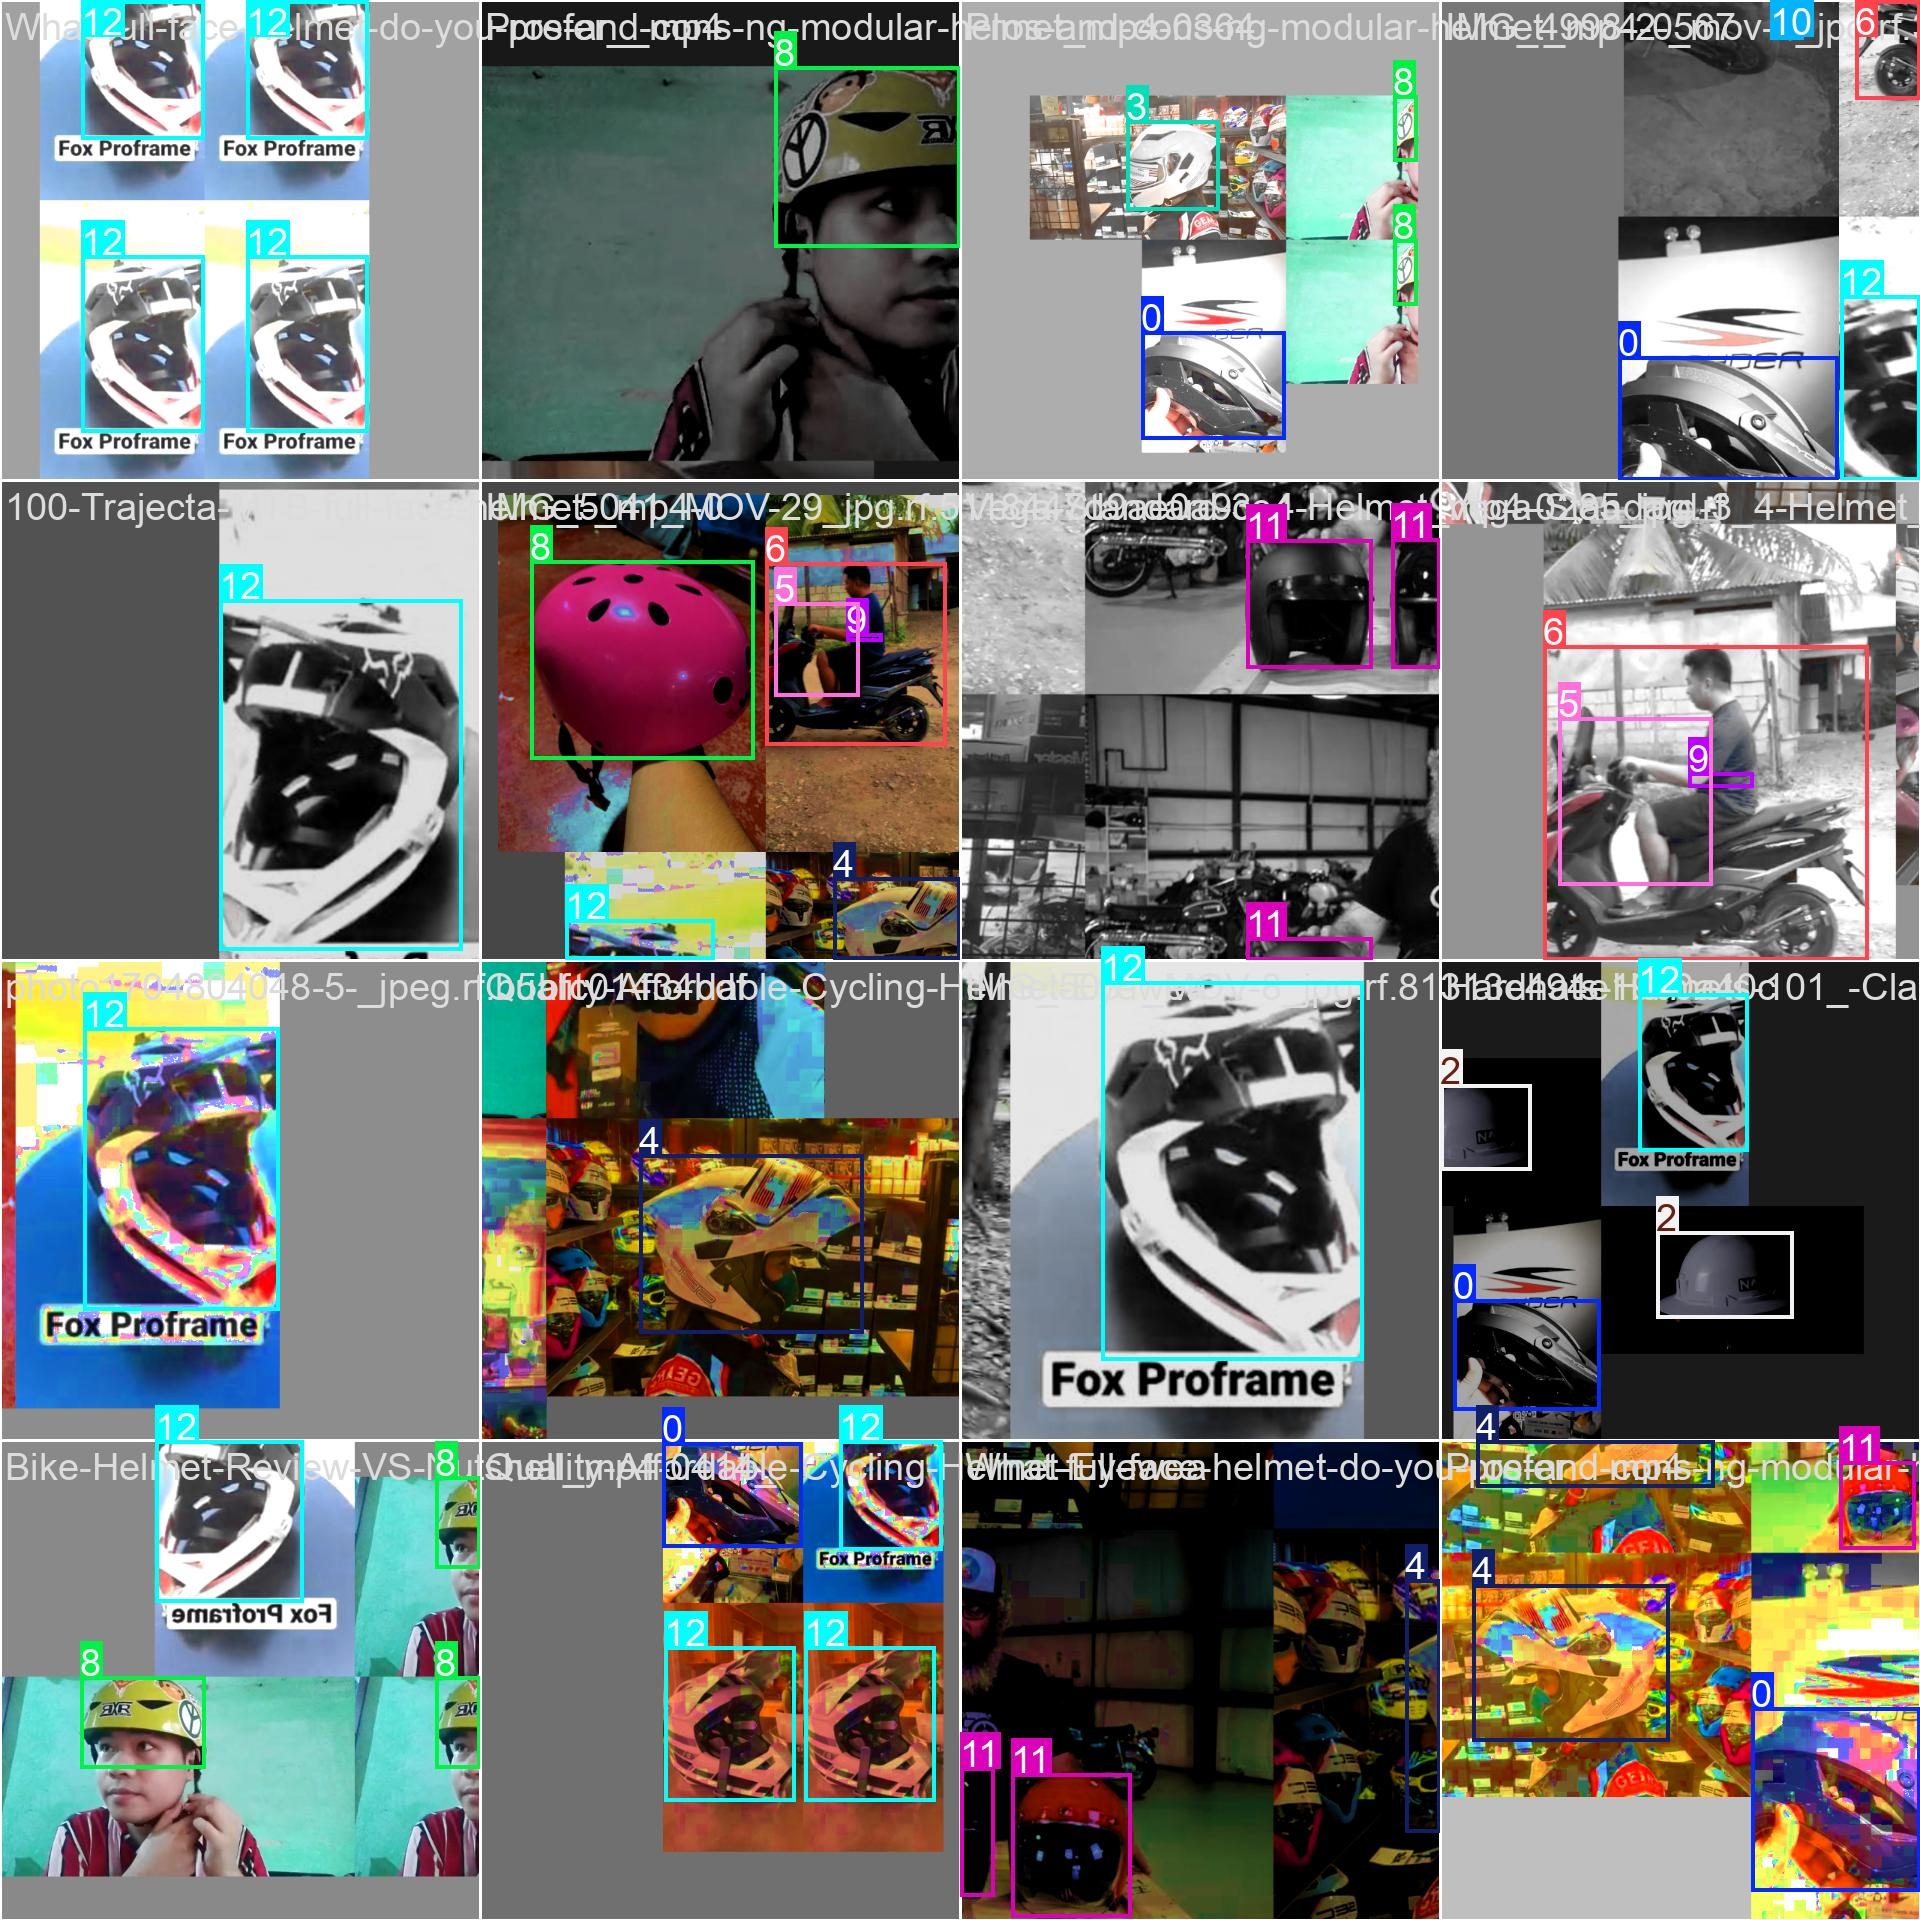

In [13]:
Image("/content/runs/detect/train2/train_batch0.jpg", width=600)

In [14]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,584,687 parameters, 0 gradients, 6.3 GFLOPs

image 1/568 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0178_jpg.rf.40daedd08d8ee073d606a4e59773f75d.jpg: 640x384 1 sports helmet, 200.7ms
image 2/568 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0179_jpg.rf.53fbc18ec2d3dbc33fa2ca90fe4d27f6.jpg: 640x384 1 sports helmet, 9.0ms
image 3/568 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0186_jpg.rf.4b0cfc853a5cddb12cc069cd568ee13f.jpg: 640x384 1 sports helmet, 13.2ms
image 4/568 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0199_jpg.rf.ab2c103b611fa0377e8d8833d0d99e72.jpg: 640x384 1 sports helmet, 11.4ms
image 5/568 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0202_jpg.rf.ff6838cf4838f7bbf9cd1d75488bceaf.jpg: 640x38

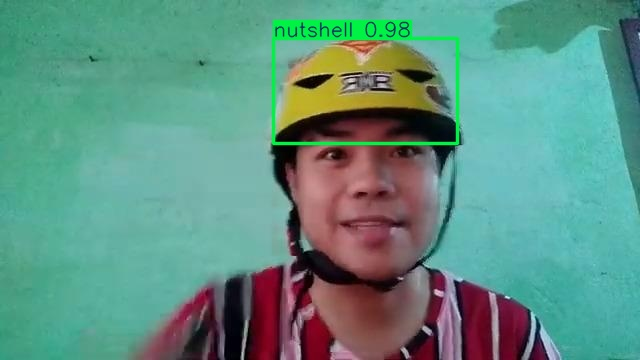

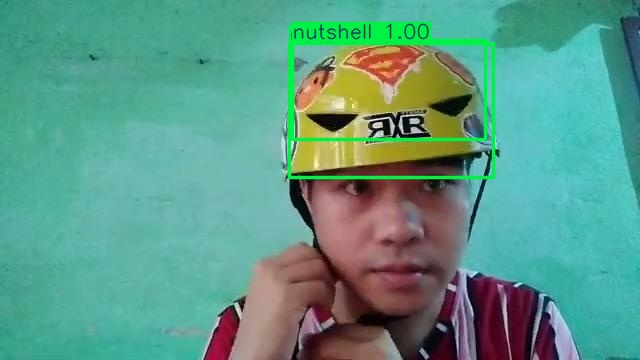

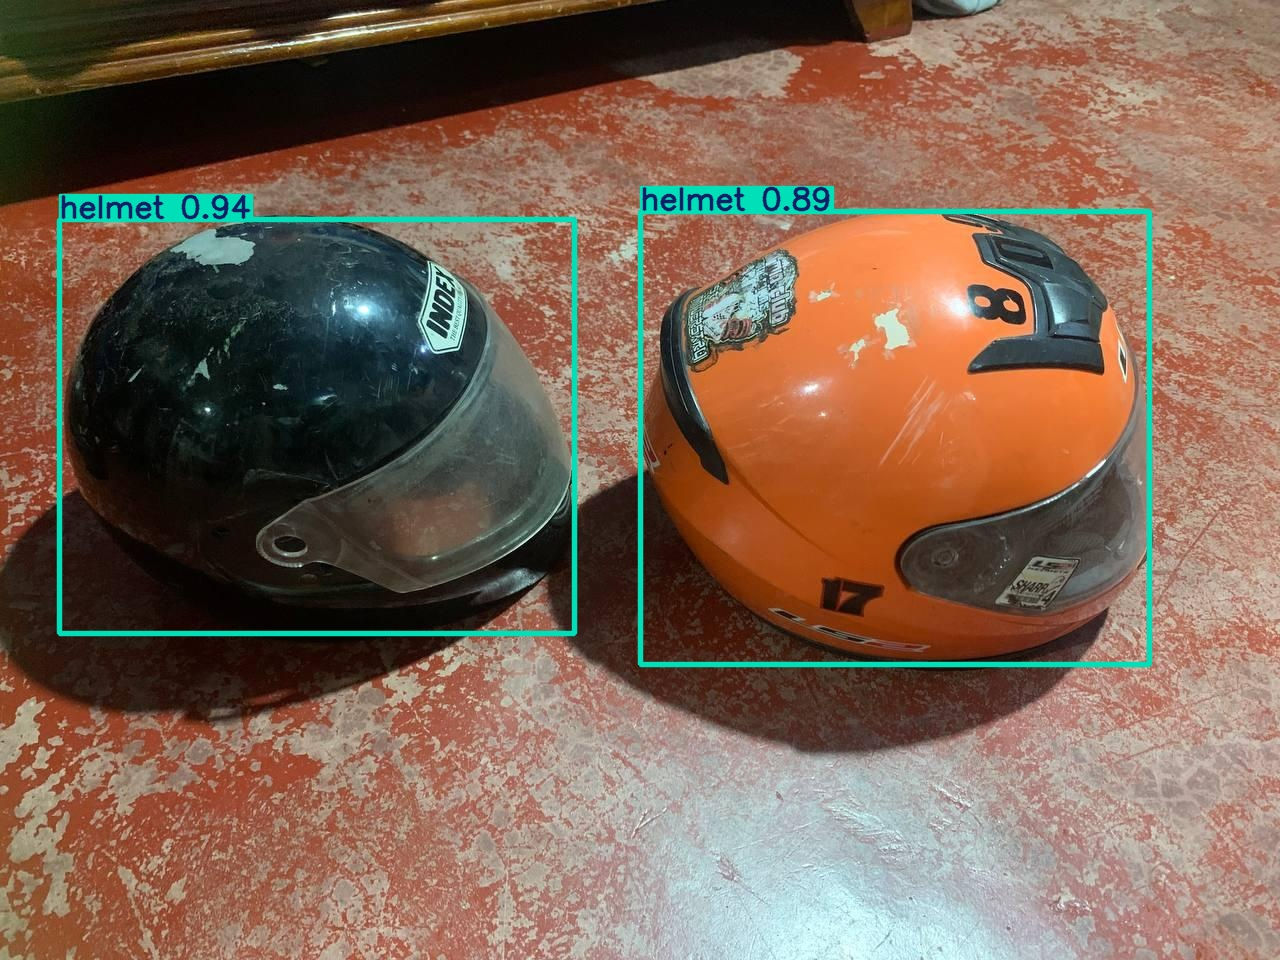

In [15]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [22]:
!yolo task=detect mode=predict model= "/content/runs/detect/train2/weights/best.pt" conf=0.25 source="/content/helmet.jpeg" save=True

Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,584,687 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/helmet.jpeg: 640x512 1 helmet, 42.3ms
Speed: 3.8ms preprocess, 42.3ms inference, 165.3ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


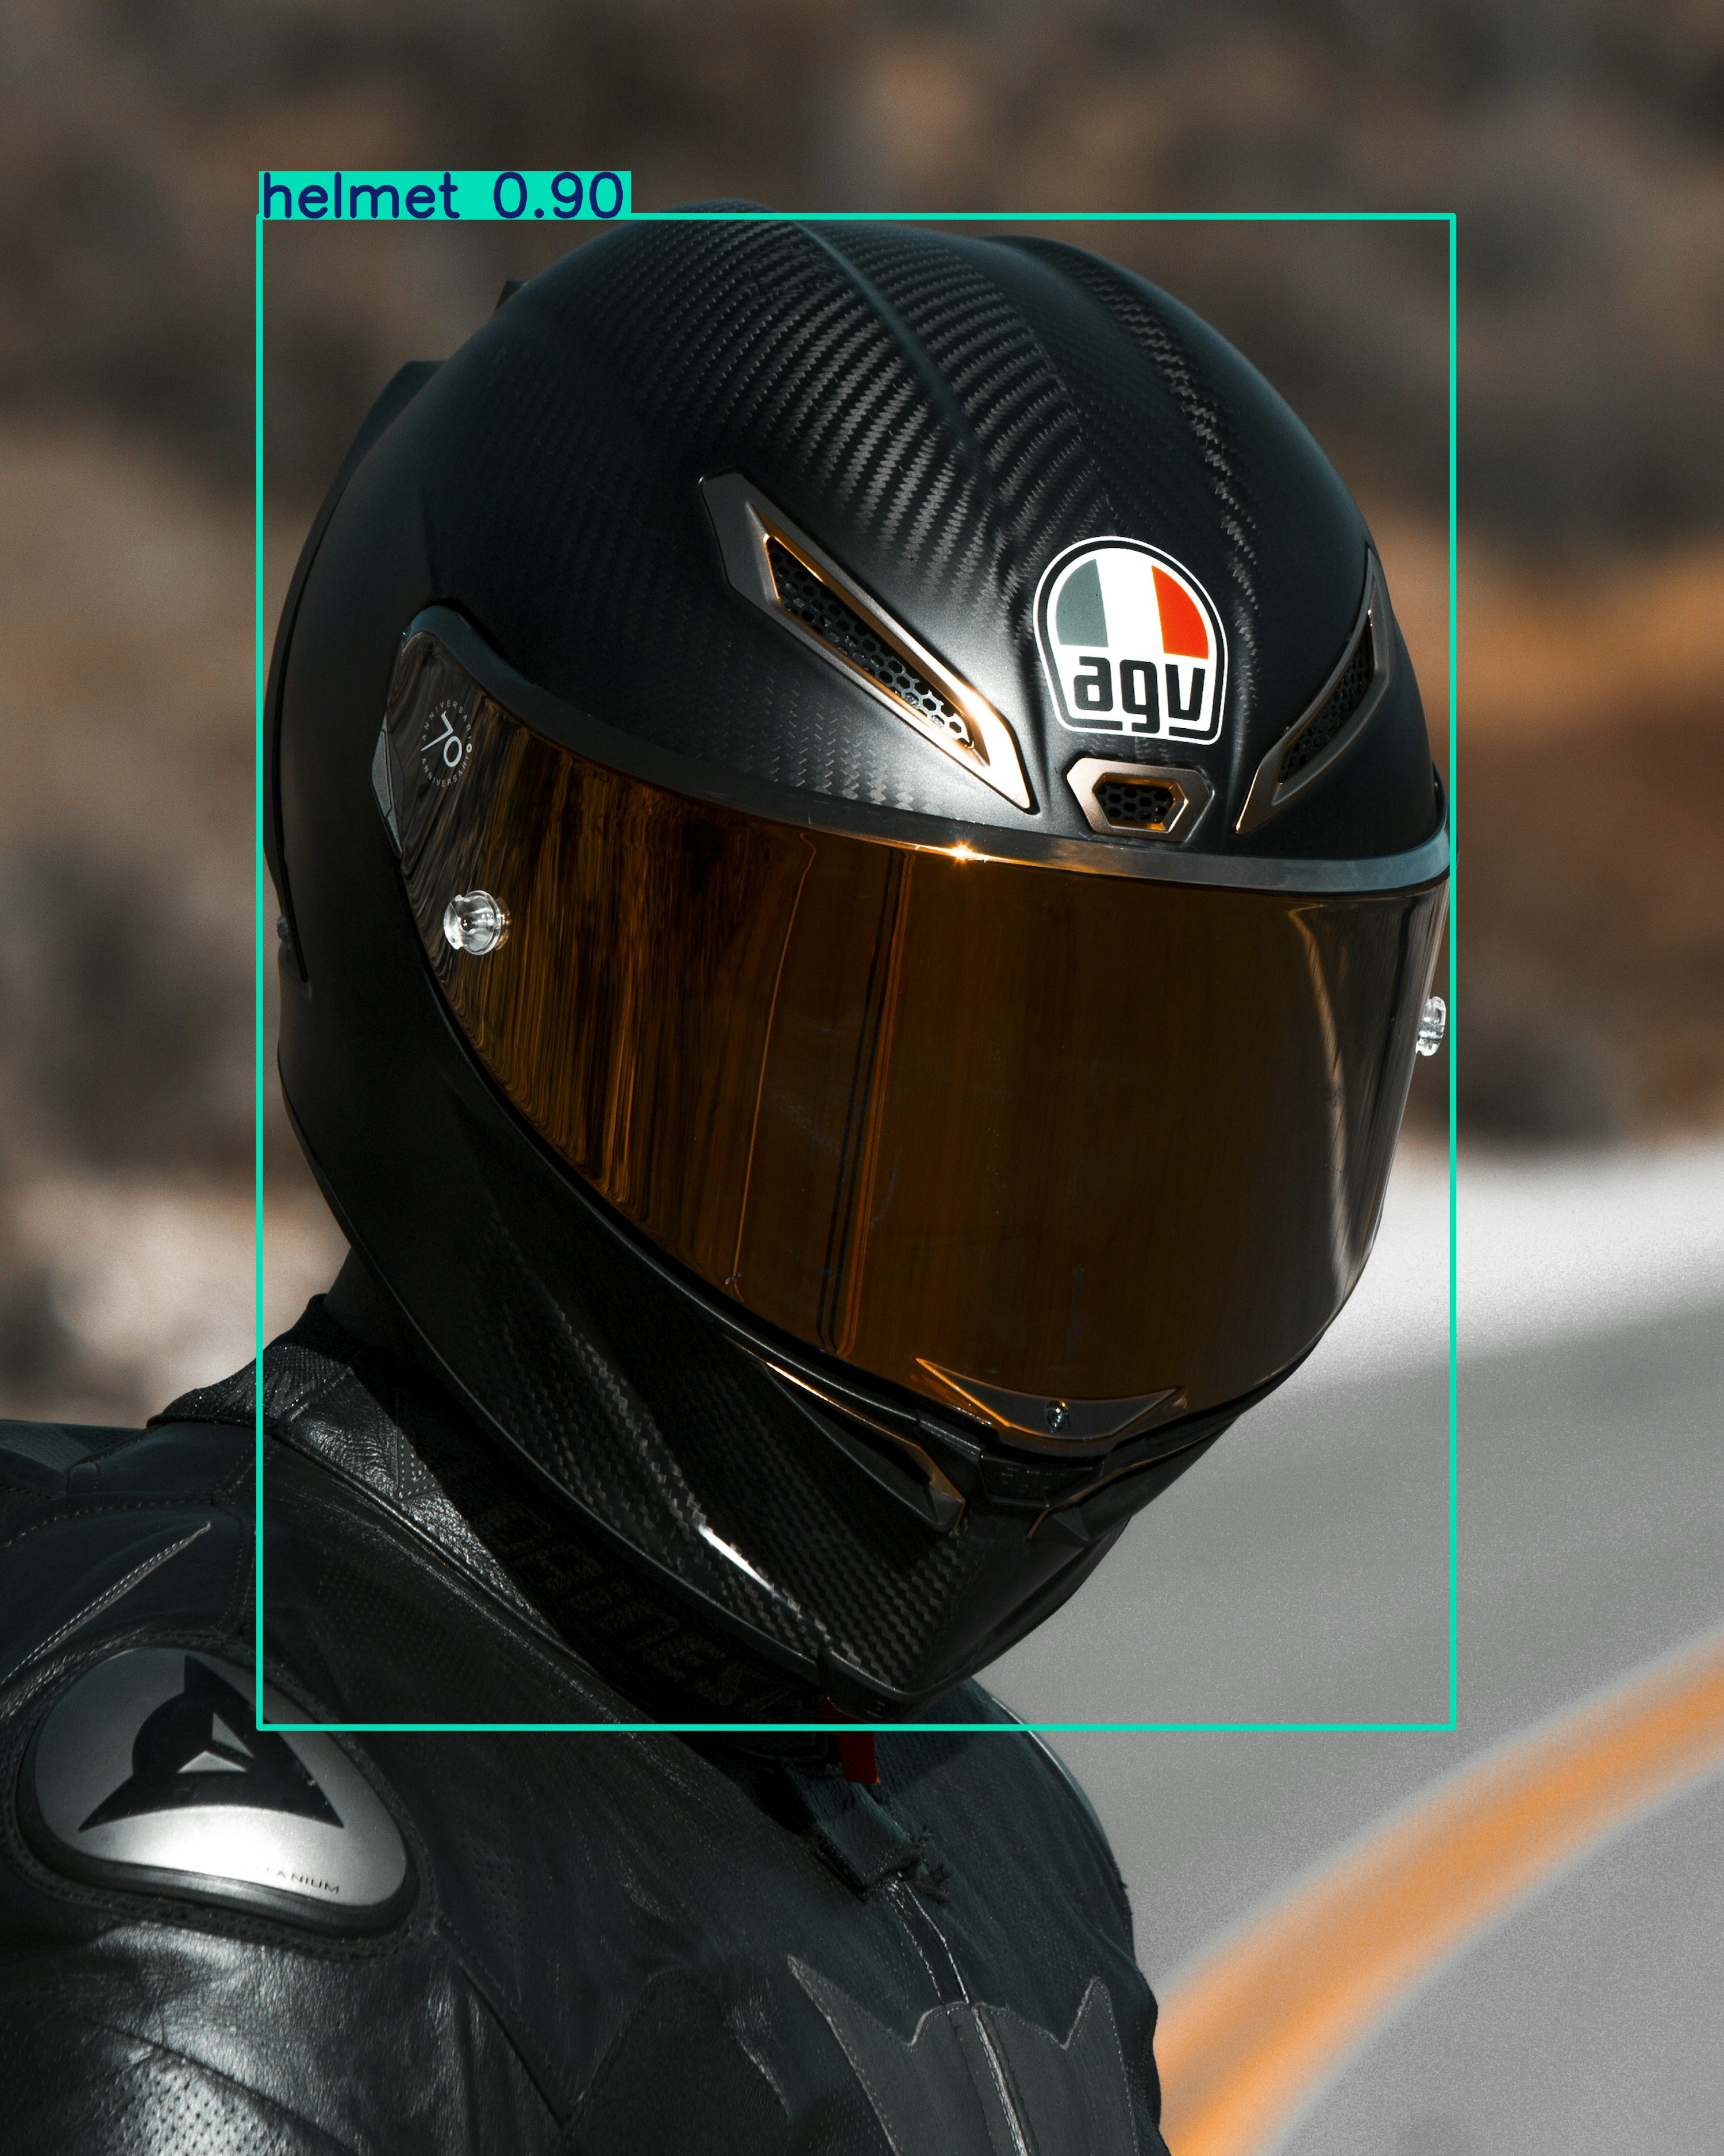

In [23]:
Image("/content/runs/detect/predict2/helmet.jpg", width=600)